# Import Libraries and import the data 

In [1]:
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.feature_selection import RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import VarianceThreshold
from pandas_profiling import ProfileReport 
## For imbalancing in the dataset
from imblearn.over_sampling import RandomOverSampler
# Anova
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif

# Apache Spark
from pyspark.sql.functions import col

from sklearn.model_selection import train_test_split, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data.csv')

# Data Exploration

In [3]:
data.head(20)

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
5,1,0.388680,0.415177,0.419134,0.590171,0.590251,0.998758,0.796903,0.808771,0.303116,...,0.710420,0.005278,0.622605,0.590172,0.829939,0.285087,0.026675,0.564538,1,0.019534
6,0,0.390923,0.445704,0.436158,0.619950,0.619950,0.998993,0.797012,0.808960,0.302814,...,0.736619,0.018372,0.623655,0.619949,0.829980,0.292504,0.026622,0.564200,1,0.015663
7,0,0.508361,0.570922,0.559077,0.601738,0.601717,0.999009,0.797449,0.809362,0.303545,...,0.815350,0.010005,0.623843,0.601739,0.841459,0.278607,0.027031,0.566089,1,0.034889
8,0,0.488519,0.545137,0.543284,0.603612,0.603612,0.998961,0.797414,0.809338,0.303584,...,0.803647,0.000824,0.623977,0.603613,0.840487,0.276423,0.026891,0.565592,1,0.065826
9,0,0.495686,0.550916,0.542963,0.599209,0.599209,0.999001,0.797404,0.809320,0.303483,...,0.804195,0.005798,0.623865,0.599205,0.840688,0.279388,0.027243,0.566668,1,0.030801


In [4]:
# Number of rows
data.shape[0]

6819

In [5]:
#Number of columns
data.shape[1]

96

In [6]:
#Column Names
data.columns

Index(['Bankrupt?', ' ROA(C) before interest and depreciation before interest',
       ' ROA(A) before interest and % after tax',
       ' ROA(B) before interest and depreciation after tax',
       ' Operating Gross Margin', ' Realized Sales Gross Margin',
       ' Operating Profit Rate', ' Pre-tax net Interest Rate',
       ' After-tax net Interest Rate',
       ' Non-industry income and expenditure/revenue',
       ' Continuous interest rate (after tax)', ' Operating Expense Rate',
       ' Research and development expense rate', ' Cash flow rate',
       ' Interest-bearing debt interest rate', ' Tax rate (A)',
       ' Net Value Per Share (B)', ' Net Value Per Share (A)',
       ' Net Value Per Share (C)', ' Persistent EPS in the Last Four Seasons',
       ' Cash Flow Per Share', ' Revenue Per Share (Yuan ¥)',
       ' Operating Profit Per Share (Yuan ¥)',
       ' Per Share Net profit before tax (Yuan ¥)',
       ' Realized Sales Gross Profit Growth Rate',
       ' Operating Profit

In [7]:
# Row names, we have an index with numbers in increasing order
data.index

RangeIndex(start=0, stop=6819, step=1)

In [8]:
# Let's check the data types
data.dtypes

Bankrupt?                                                     int64
 ROA(C) before interest and depreciation before interest    float64
 ROA(A) before interest and % after tax                     float64
 ROA(B) before interest and depreciation after tax          float64
 Operating Gross Margin                                     float64
                                                             ...   
 Liability to Equity                                        float64
 Degree of Financial Leverage (DFL)                         float64
 Interest Coverage Ratio (Interest expense to EBIT)         float64
 Net Income Flag                                              int64
 Equity to Liability                                        float64
Length: 96, dtype: object

In [9]:
# Let's check with info() because the output is too large to show with dtypes.
data.info()
# We have 3 integer and 93 float values, 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [10]:
# Let's check how many bankrupts have occurs in the dataset.
data['Bankrupt?'].value_counts().tail()

0    6599
1     220
Name: Bankrupt?, dtype: int64

In this dataset we have different numbers of training examples in the outcome classes, it can lead to imbalanced class distributions and potentially biased or inaccurate model predictions. There are several strategies that we can use to address this issue and improve the performance of the model.

One approach is to collect more data for the underrepresented classes, so that the class distributions are more balanced. This can help to reduce the bias of the model and improve its performance on the underrepresented classes. However, collecting more data isn't possible in our scenario.

Another approach is to use techniques like oversampling or undersampling to adjust the class distributions in the training data. Oversampling involves increasing the number of examples for the underrepresented classes by randomly repeating some of the existing examples, while undersampling involves reducing the number of examples for the overrepresented classes by randomly removing some of the existing examples. These techniques can help to balance the class distributions and improve the performance of our model on the underrepresented classes.

Finally, we can use algorithms or methods that are specifically designed to handle imbalanced class distributions. These methods often involve modifying the loss function or optimization algorithm used by the model to give more weight to the underrepresented classes and improve the model's performance on those classes. Examples of these methods include the use of cost-sensitive learning or class-balanced loss functions.

In [11]:
# Basic Statistics, actually we don't need include all cause all our columns are numeric.
data.describe(include='all')

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [12]:
# We can check individual columns statistics, let's see the Operating Profit Rate
data[' Operating Profit Rate'].describe()

count    6819.000000
mean        0.998755
std         0.013010
min         0.000000
25%         0.998969
50%         0.999022
75%         0.999095
max         1.000000
Name:  Operating Profit Rate, dtype: float64

In [13]:
# Also ROA(C) before interest and depreciation before interest
data[' ROA(C) before interest and depreciation before interest'].describe()

count    6819.000000
mean        0.505180
std         0.060686
min         0.000000
25%         0.476527
50%         0.502706
75%         0.535563
max         1.000000
Name:  ROA(C) before interest and depreciation before interest, dtype: float64

In [14]:
data

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


# Correlation Analysis

In [15]:
correlations =  data.corr()
# Sort the correlations in descending order
correlations = correlations.sort_values("Bankrupt?", ascending=False)
top_10 = correlations.head(10)
top_10

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
Bankrupt?,1.000000,-0.260807,-0.282941,-0.273051,-0.100043,-0.099445,-0.000230,-0.008517,-0.008857,-0.016593,...,-0.315457,0.035104,-0.005547,-0.100044,-0.180987,0.166812,0.010508,-0.005509,NaN,-0.083048
Debt ratio %,0.250161,-0.261427,-0.259972,-0.264734,-0.245460,-0.245606,0.010397,-0.003906,-0.006174,-0.033214,...,-0.281422,0.041055,-0.050218,-0.245461,-0.123986,0.349250,0.017982,0.012571,NaN,-0.625879
Current Liability to Assets,0.194494,-0.210256,-0.190501,-0.217186,-0.198027,-0.197842,0.011340,0.001632,-0.002805,-0.024357,...,-0.214085,0.056086,-0.053657,-0.198028,-0.092725,0.286398,0.006987,0.021428,NaN,-0.506360
Borrowing dependency,0.176543,-0.161671,-0.161868,-0.158618,-0.085733,-0.085598,0.001092,-0.004654,-0.004395,-0.012037,...,-0.177781,0.011083,-0.004183,-0.085732,-0.806478,0.955857,0.007260,0.001776,NaN,-0.146012
Current Liability to Current Assets,0.171306,-0.160725,-0.195673,-0.162572,-0.132650,-0.132607,-0.079679,-0.138584,-0.166453,-0.084875,...,-0.202751,0.012853,-0.049342,-0.132652,-0.070354,0.132372,0.022033,0.007652,NaN,-0.262199
Liability to Equity,0.166812,-0.143629,-0.141039,-0.142838,-0.085434,-0.085407,0.001541,-0.004043,-0.004390,-0.011899,...,-0.159697,0.021982,-0.003724,-0.085434,-0.791836,1.000000,0.002119,0.001487,NaN,-0.159654
Current Liabilities/Equity,0.153828,-0.142734,-0.133816,-0.142879,-0.080422,-0.080350,0.001860,-0.002202,-0.003196,-0.008969,...,-0.150319,0.026494,-0.004032,-0.080422,-0.749621,0.963908,0.000745,0.005038,NaN,-0.156443
Current Liability to Equity,0.153828,-0.142734,-0.133816,-0.142879,-0.080422,-0.080350,0.001860,-0.002202,-0.003196,-0.008969,...,-0.150319,0.026494,-0.004032,-0.080422,-0.749621,0.963908,0.000745,0.005038,NaN,-0.156443
Liability-Assets Flag,0.139212,-0.109272,-0.156890,-0.120680,-0.032930,-0.032920,-0.000295,-0.003163,-0.002746,-0.005652,...,-0.169104,0.032788,-0.023927,-0.032932,0.192688,-0.229559,-0.001717,-0.000974,NaN,-0.027573
Total expense/Assets,0.139049,-0.296019,-0.357147,-0.322223,0.225479,0.226170,0.005401,-0.004525,-0.002803,-0.022281,...,-0.470498,0.107944,-0.004314,0.225478,-0.190700,0.050501,-0.017607,-0.005122,NaN,0.007907


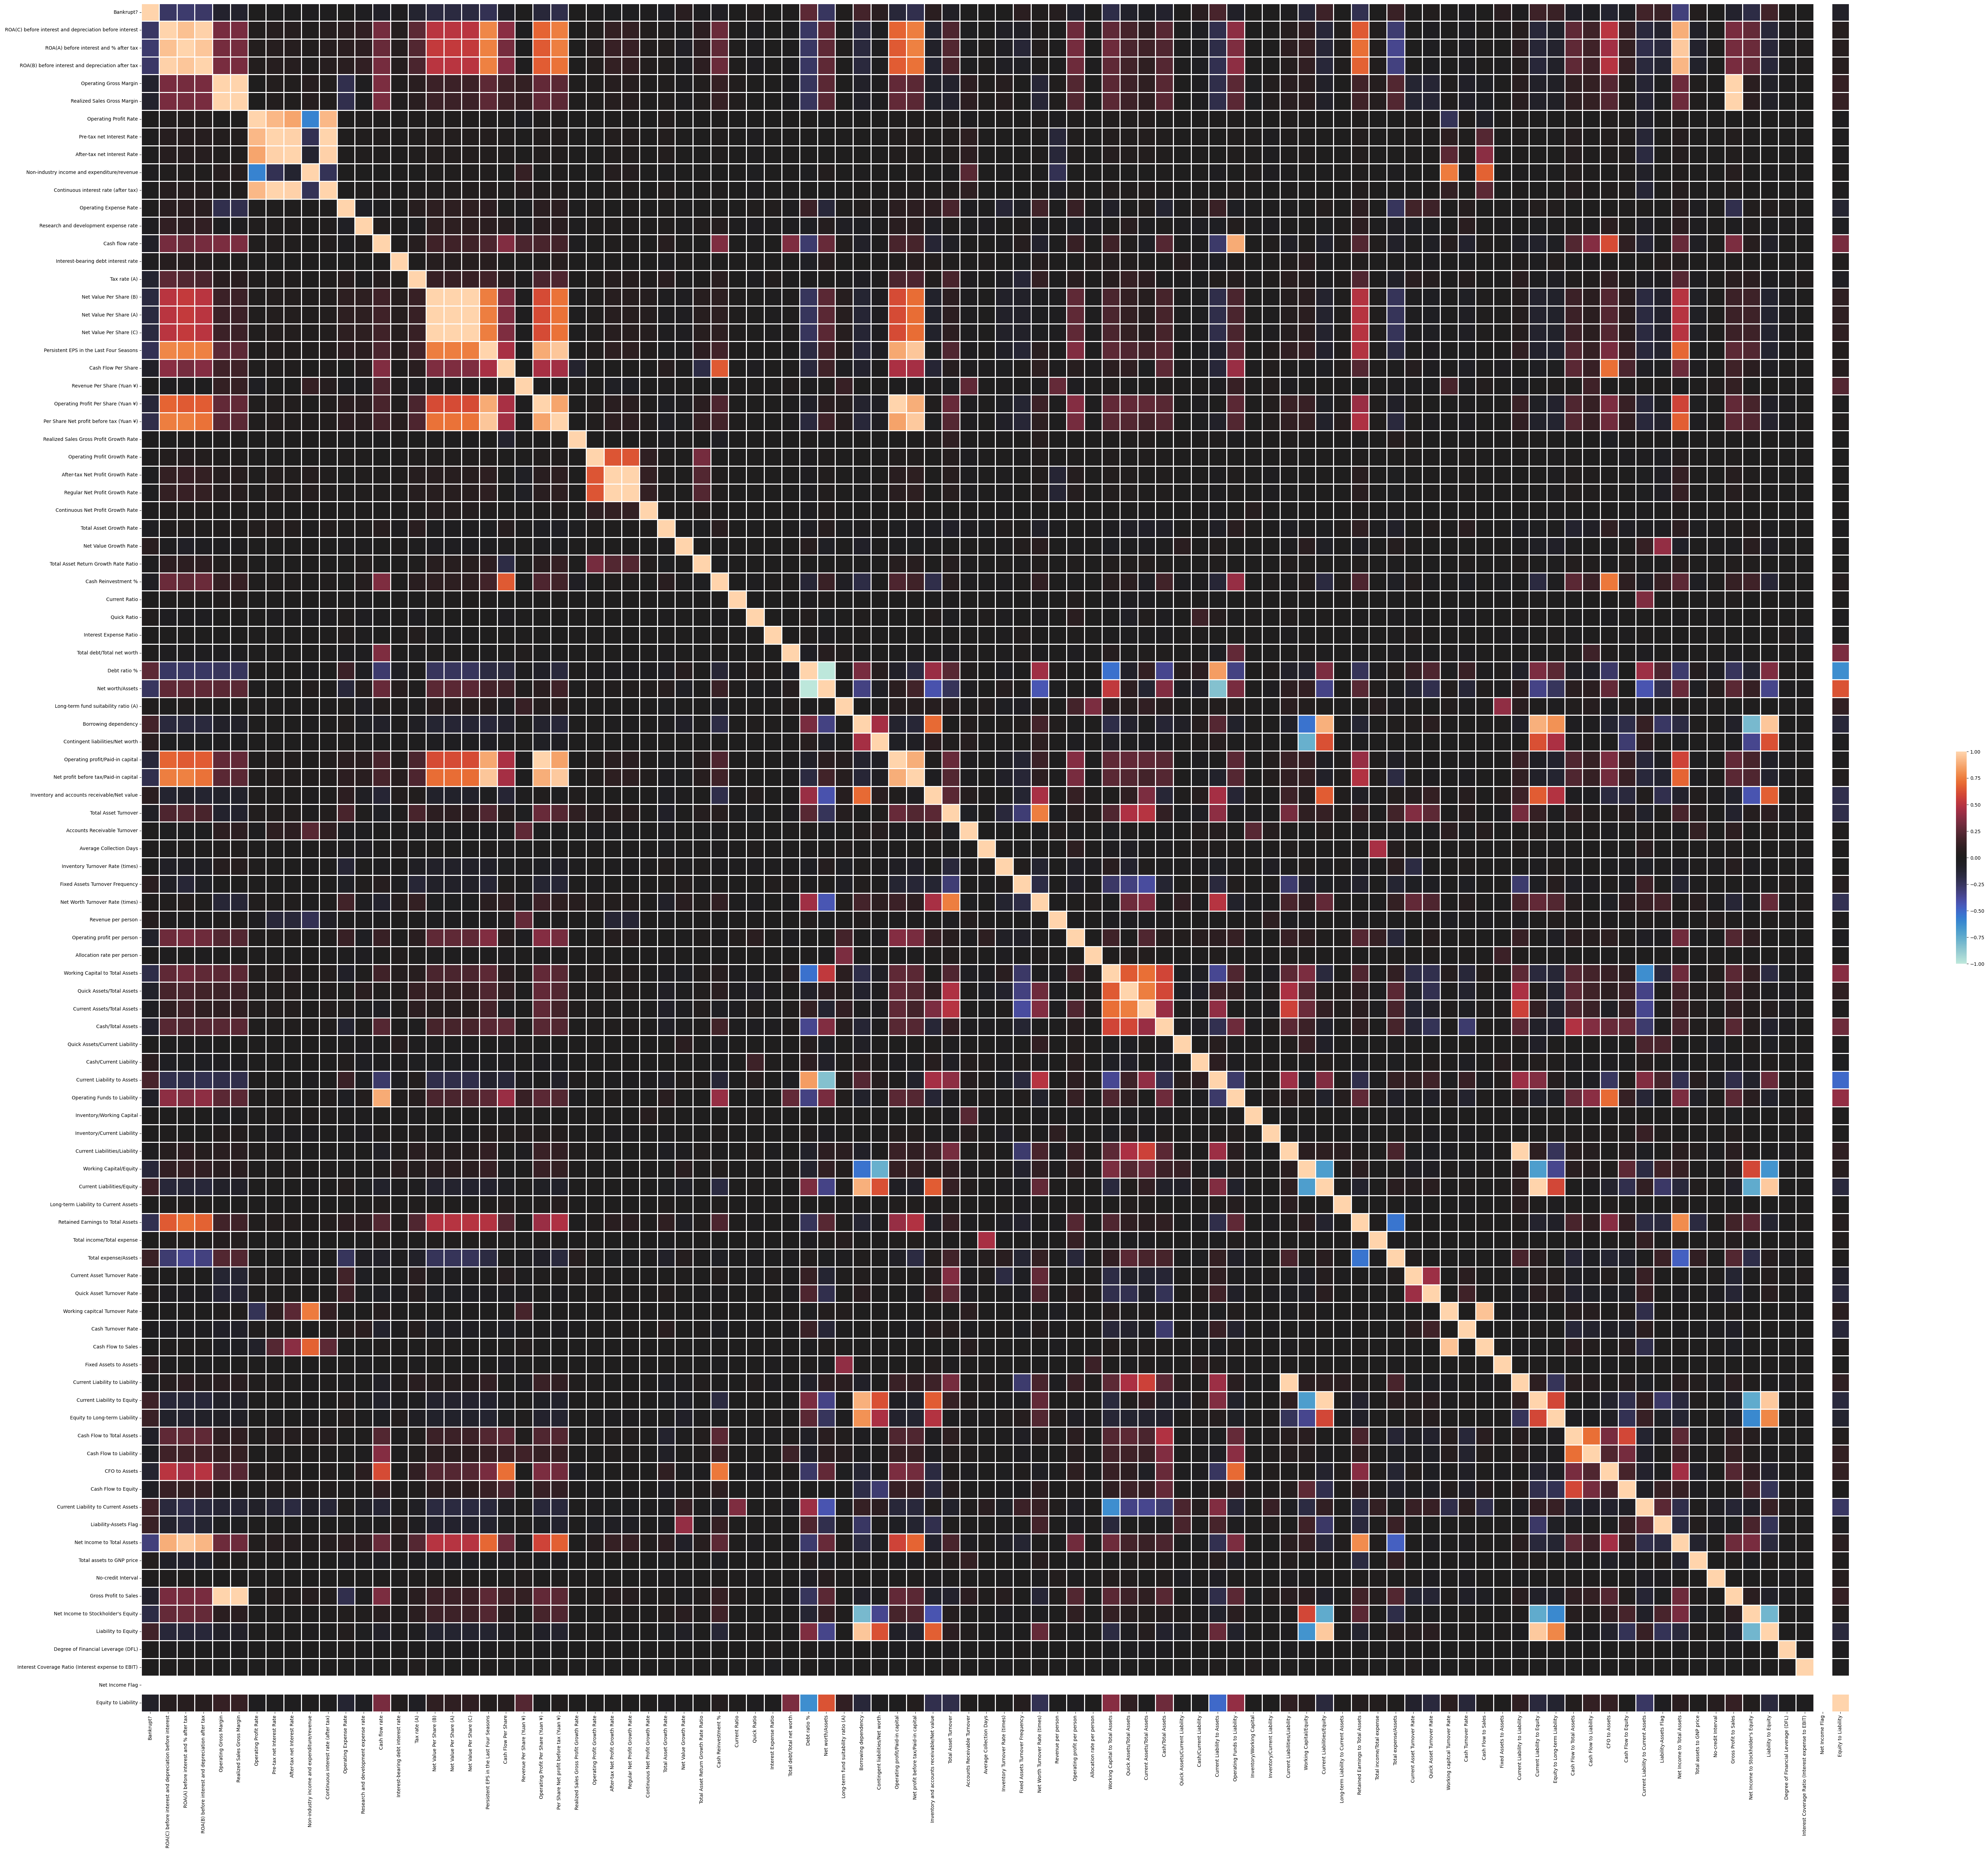

In [16]:
def correlation_heatmap(data):
    correlations = data.corr()

    fig, ax = plt.subplots(figsize=(80,80))
    sns.heatmap(correlations, vmax=1.0, center=0, fmt='.2f',
                square=True, linewidths=.8, annot=False, cbar_kws={"shrink": .10})
    plt.show();
    
correlation_heatmap(data)

Low variance. Suppose you have two features, gender that contains only one gender value (e.g., Female), and 2) age that contains different values between 30 and 50 years old. In this case, the gender feature has low variance since the values in this attribute are all the same, and during the model training stage, it won’t help the model to find any patterns; therefore, you save for dropping this feature.

In [17]:
def drop_low_variance(data):
    variance = VarianceThreshold(threshold = (.9 * (1 - .9))) 
    variance.fit(data) 
    array = variance.get_support()
    index_dict= {}
    copy_df = pd.read_csv('data.csv')
    for i in range(len(array)):
        if i != 0 and array[i] == False:
            data = data.drop(copy_df.columns[i], axis=1)
    return data

In [18]:
Data_WO_LV = drop_low_variance(data)
Data_WO_LV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 25 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Bankrupt?                               6819 non-null   int64  
 1    Operating Expense Rate                 6819 non-null   float64
 2    Research and development expense rate  6819 non-null   float64
 3    Interest-bearing debt interest rate    6819 non-null   float64
 4    Revenue Per Share (Yuan ¥)             6819 non-null   float64
 5    Total Asset Growth Rate                6819 non-null   float64
 6    Net Value Growth Rate                  6819 non-null   float64
 7    Current Ratio                          6819 non-null   float64
 8    Quick Ratio                            6819 non-null   float64
 9    Total debt/Total net worth             6819 non-null   float64
 10   Accounts Receivable Turnover           6819 non-null   floa

In [19]:
Cor=Data_WO_LV.corr() 
Cor

,Bankrupt?,Operating Expense Rate,Research and development expense rate,Interest-bearing debt interest rate,Revenue Per Share (Yuan ¥),Total Asset Growth Rate,Net Value Growth Rate,Current Ratio,Quick Ratio,Total debt/Total net worth,...,Allocation rate per person,Quick Assets/Current Liability,Cash/Current Liability,Inventory/Current Liability,Long-term Liability to Current Assets,Current Asset Turnover Rate,Quick Asset Turnover Rate,Cash Turnover Rate,Fixed Assets to Assets,Total assets to GNP price
Bankrupt?,1.000000,-0.006083,-0.024232,-0.023063,-0.004692,-0.044431,0.065329,-0.002211,0.025058,0.012314,...,0.002829,-0.003823,0.077921,0.000822,0.000778,0.011929,0.025814,-0.018035,0.066328,0.035104
Operating Expense Rate,-0.006083,1.000000,-0.060386,-0.006011,-0.015838,0.014168,-0.008456,-0.007464,0.017687,-0.016164,...,-0.009231,-0.012904,0.024258,-0.011448,0.001729,0.170776,0.153936,0.040730,-0.007464,-0.025524
Research and development expense rate,-0.024232,-0.060386,1.000000,0.000656,-0.019291,0.023189,-0.010300,-0.009092,-0.025702,-0.019292,...,-0.028073,-0.015717,-0.042133,-0.023691,0.008636,-0.046460,-0.034643,0.070369,-0.009092,-0.020166
Interest-bearing debt interest rate,-0.023063,-0.006011,0.000656,1.000000,-0.003904,-0.018700,0.013614,-0.001840,-0.005201,-0.003984,...,0.024254,0.055143,-0.011063,0.011240,0.006090,-0.009759,-0.026821,-0.019243,-0.001840,-0.007519
Revenue Per Share (Yuan ¥),-0.004692,-0.015838,-0.019291,-0.003904,1.000000,-0.010670,-0.000353,-0.000311,-0.000880,0.029592,...,-0.000982,-0.000538,-0.001871,0.037494,-0.002441,-0.010894,-0.016476,-0.021618,-0.000311,-0.001272
Total Asset Growth Rate,-0.044431,0.014168,0.023189,-0.018700,-0.010670,1.000000,-0.008688,0.006779,-0.013451,-0.012469,...,-0.010750,-0.002528,0.006808,-0.011164,0.016918,0.000739,0.032340,0.064419,0.006570,-0.038909
Net Value Growth Rate,0.065329,-0.008456,-0.010300,0.013614,-0.000353,-0.008688,1.000000,-0.000166,-0.000470,-0.000360,...,-0.000524,0.075915,-0.000999,-0.001316,-0.001303,0.008879,0.006129,-0.002081,-0.000166,-0.000679
Current Ratio,-0.002211,-0.007464,-0.009092,-0.001840,-0.000311,0.006779,-0.000166,1.000000,-0.000415,-0.000318,...,-0.000463,-0.000254,-0.000882,-0.001161,-0.001150,-0.002240,-0.007291,-0.003635,-0.000147,-0.000599
Quick Ratio,0.025058,0.017687,-0.025702,-0.005201,-0.000880,-0.013451,-0.000470,-0.000415,1.000000,-0.000898,...,-0.001309,-0.000717,0.151987,-0.003283,-0.003252,-0.014514,0.007069,-0.022126,-0.000415,-0.001694
Total debt/Total net worth,0.012314,-0.016164,-0.019292,-0.003984,0.029592,-0.012469,-0.000360,-0.000318,-0.000898,1.000000,...,-0.001002,-0.000549,-0.001910,-0.002515,-0.002491,-0.011118,-0.016815,-0.016561,-0.000318,-0.001298


<AxesSubplot: >

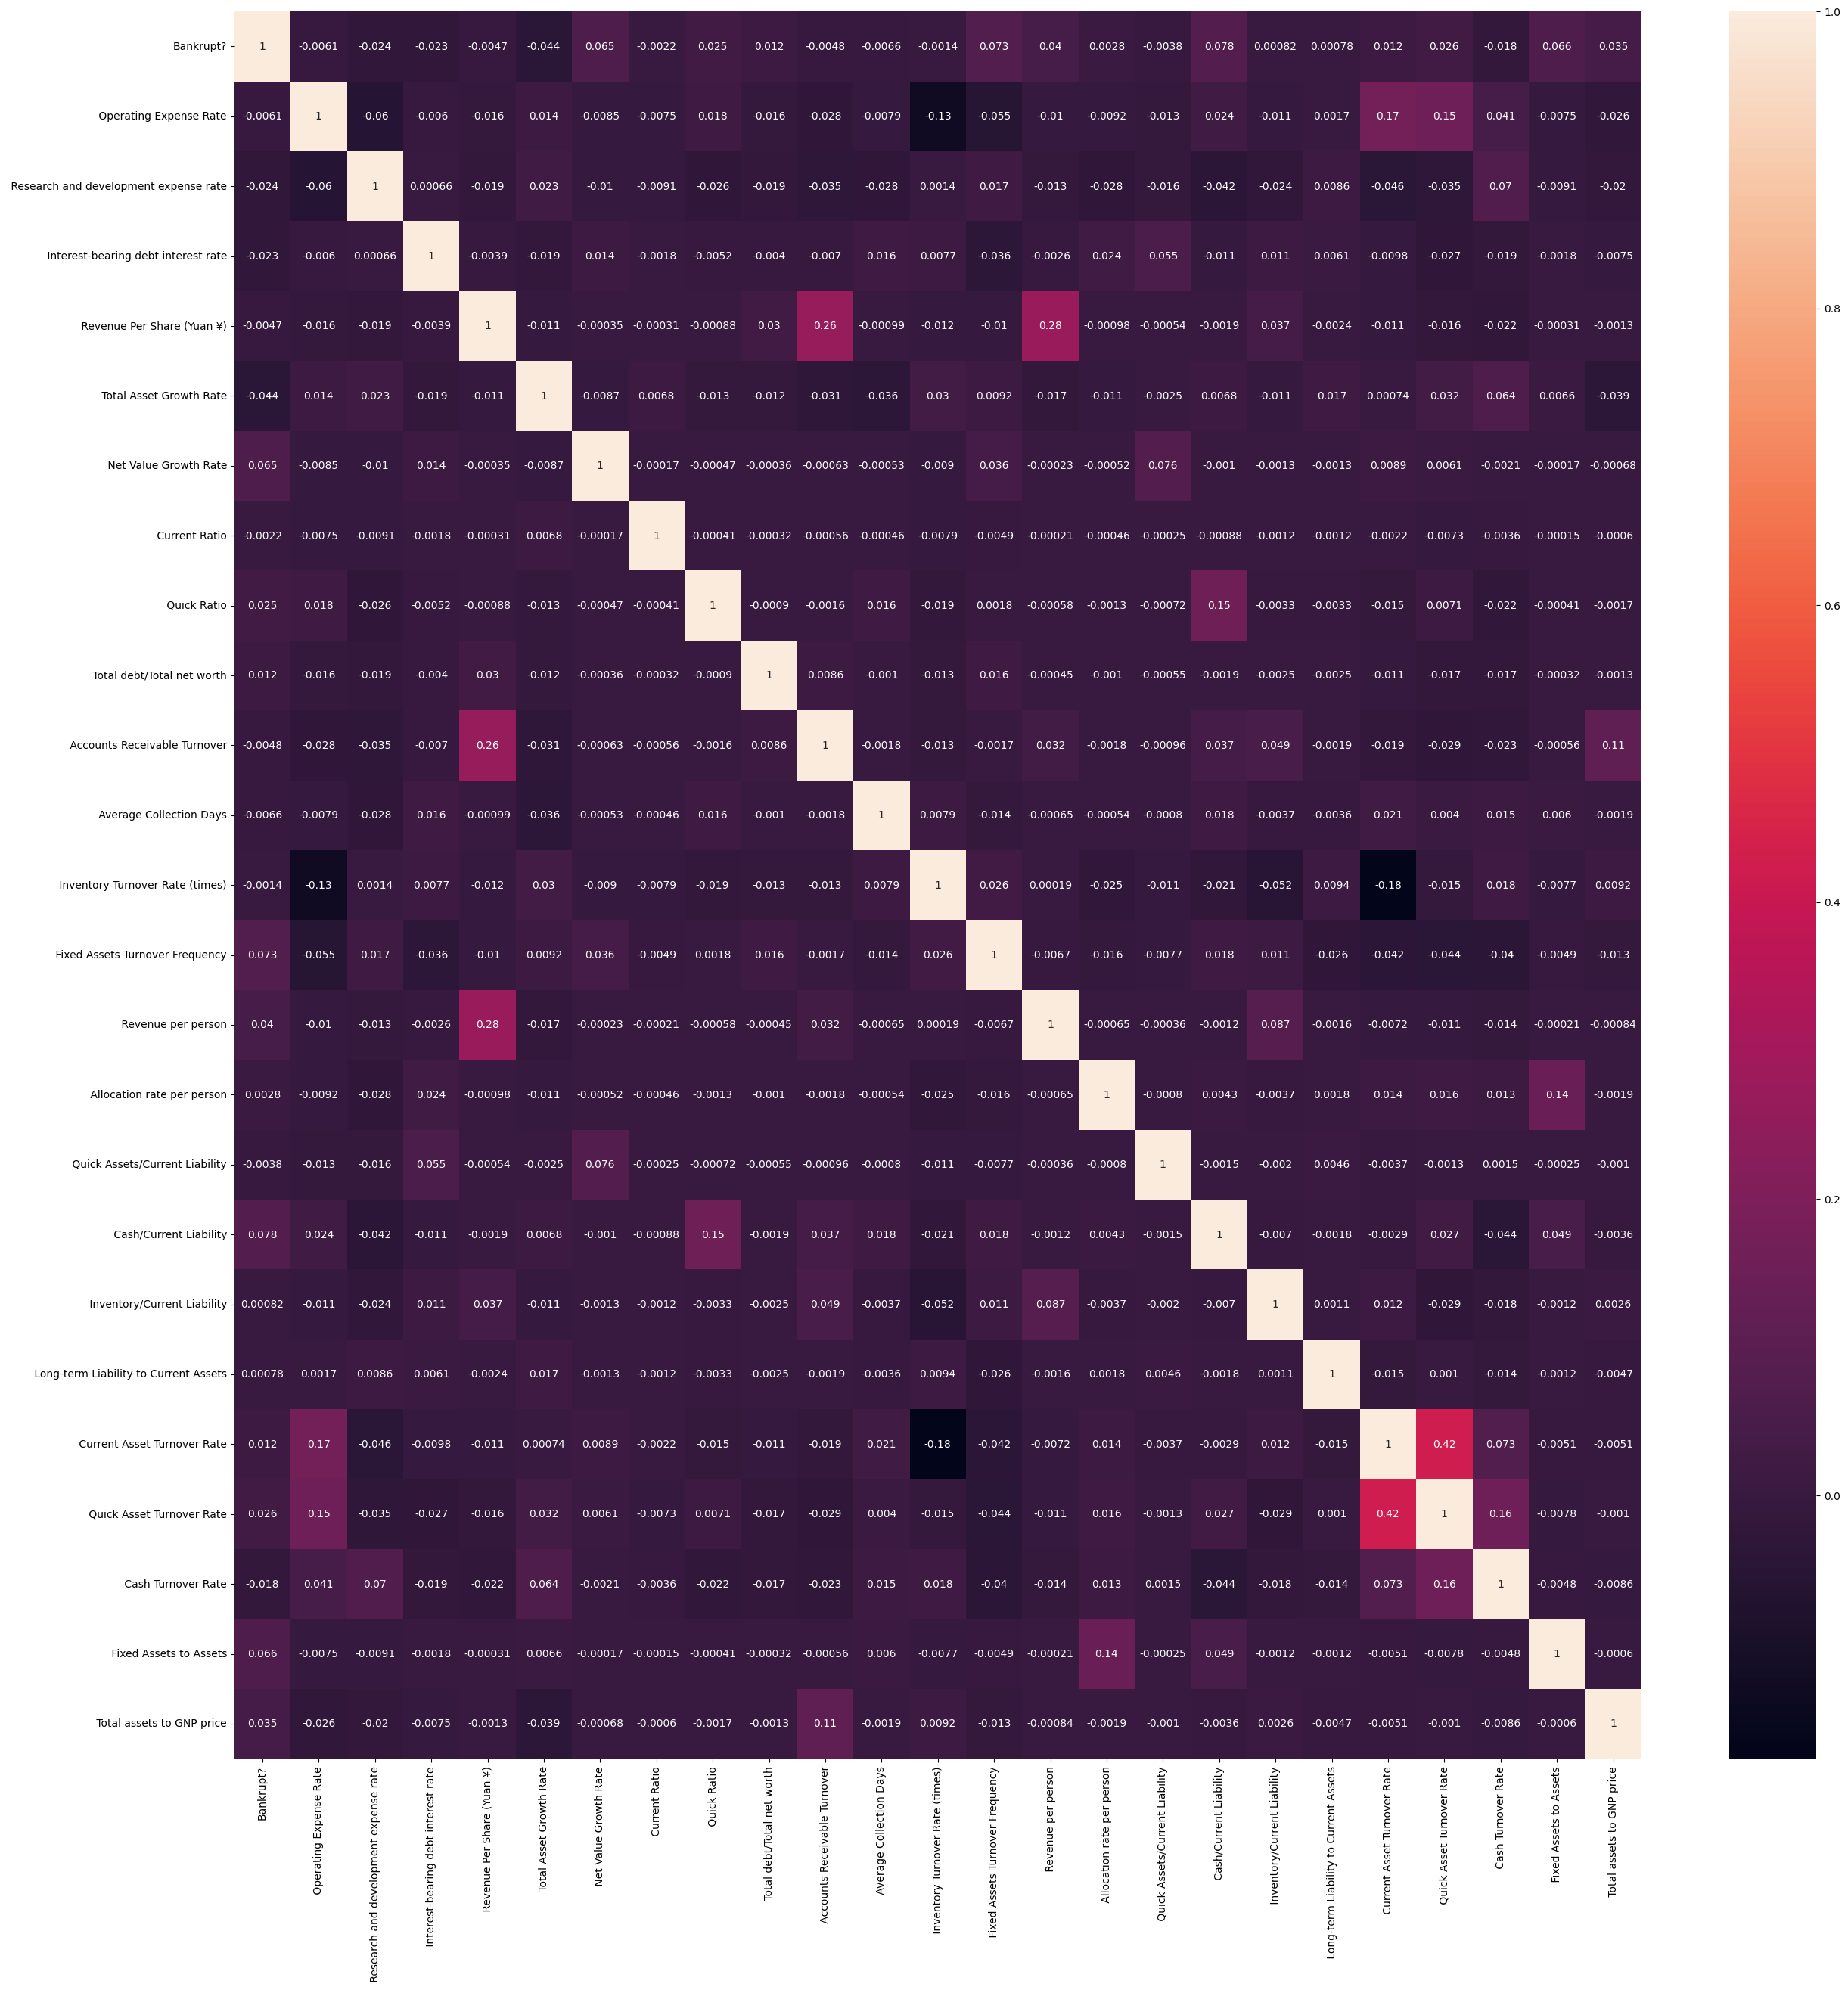

In [25]:
%matplotlib inline 
plt.figure(figsize=(30,30)) 
sns.heatmap(Cor, annot=True)

# Oversampling

In [ ]:
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Create the oversampler
oversampler = RandomOverSampler()

# Oversample the minority class
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [40]:
X = Data_WO_LV.drop('Bankrupt?', axis=1)
y = Data_WO_LV[['Bankrupt?']]
y = y.values.ravel()

# Create the oversampler
oversampler = RandomOverSampler()
# Oversample the minority class
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [43]:
len(y_oversampled)

13198

In [48]:
X = Data_WO_LV.drop('Bankrupt?', axis=1)
y = Data_WO_LV[['Bankrupt?']]
y = y.values.ravel()

# Create the oversampler
oversampler = RandomOverSampler()
# Oversample the minority class
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.25, random_state=42)

#importing the necessary libraries
from mlxtend.feature_selection import SequentialFeatureSelector as SFS
# Sequential Forward Selection(sfs)
sfs = SFS(LogisticRegression(),
          k_features='best',
          forward=False,
          floating=False,
          scoring = 'precision',
          cv = 2)
sfs.fit(X, y)
sfs.k_feature_names_ 

/home/mert/anaconda3/envs/TestEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/mert/anaconda3/envs/TestEnv/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_

(' Operating Expense Rate',
 ' Research and development expense rate',
 ' Interest-bearing debt interest rate',
 ' Revenue Per Share (Yuan ¥)',
 ' Accounts Receivable Turnover',
 ' Inventory Turnover Rate (times)',
 ' Fixed Assets Turnover Frequency',
 ' Cash/Current Liability',
 ' Quick Asset Turnover Rate')

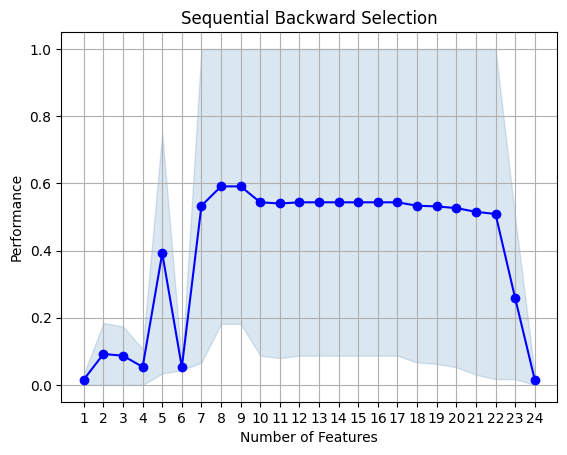

In [50]:
fig1 = plot_sfs(sfs.get_metric_dict(), kind='std_dev')
plt.title('Sequential Backward Selection')
plt.grid()
plt.show()

# Feature Selection Anova ( without oversampling )

In [ ]:
# There are too many Features, let's use ANOVA F-value to select the top 10 features from the dataset
# It's adviced that we use ANOVA F-value instead of chi-squared because of the imbalance in the output class.

In [ ]:
feature_names = X.columns
# Load the data
# Select the features and target
X = data.drop('Bankrupt?', axis=1)
y = data['Bankrupt?']

# Select the top 10 features using the ANOVA F-value
selector = SelectKBest(f_classif, k=10)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the names of the selected features
print([feature_names[i] for i in selected_feature_indices])

In [ ]:
selected_feature_indices

In [ ]:
selected_feature_names = [feature_names[i] for i in selected_feature_indices]
Selected_Features= X.loc[:, selected_feature_names]

In [ ]:
Selected_Features

In [ ]:
Selected_Features.describe()

# Feature Selection - Recursive Feature Elimination without oversampling 


Note: The following methods can't be performed on a huge datasets, for those, we need to use Spark.

In [ ]:
classifier = RandomForestClassifier()

# Use RFE to select the top 10 features
selector = RFE(estimator=classifier, n_features_to_select=10)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the names of the selected features
print([feature_names[i] for i in selected_feature_indices])
selected_feature_names_RFE = [feature_names[i] for i in selected_feature_indices]
Selected_Features_RFE= X.loc[:, selected_feature_names_RFE]

Recursive feature elimination (RFE)  can be used on unbalanced datasets, but the results may be affected by the imbalanced class distribution.

In [ ]:
# Since the output class is unbalanced
classifier_weight_balanced = RandomForestClassifier(class_weight='balanced')

# Use RFE to select the top 10 features
selector = RFE(estimator=classifier_weight_balanced, n_features_to_select=10)
X_selected = selector.fit_transform(X, y)

# Get the indices of the selected features
selected_feature_indices_balanced = selector.get_support(indices=True)

# Print the names of the selected features
print([feature_names[i] for i in selected_feature_indices_balanced])
selected_feature_names_RFE_Balanced = [feature_names[i] for i in selected_feature_indices_balanced]
Selected_Features_RFE_Balanced= X.loc[:, selected_feature_names_RFE_Balanced]

Now we have performed, Anova, and RFE. We can put all the features together, and have correlation analysis to select the final features.

In [ ]:
df_merged = pd.concat([Selected_Features, Selected_Features_RFE, Selected_Features_RFE_Balanced],axis=1)

In [ ]:
df_merged.info()

In [ ]:
df_merged.corr()

# Anova ( with oversampling )

In [ ]:
feature_names = X.columns

# Select the top 10 features using the ANOVA F-value
selector = SelectKBest(f_classif, k=10)
X_select = selector.fit_transform(X_oversampled, y_oversampled)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the names of the selected features
print([feature_names[i] for i in selected_feature_indices])

In [ ]:
X_select

In [ ]:
selected_feature_indices

# Feature Selection  (RFE) (Oversampling)

In [ ]:
# Save the time
start_time = time.time()
classifier = RandomForestClassifier()

# Use RFE to select the top 10 features
selector = RFE(estimator=classifier, n_features_to_select=10)
X_selected = selector.fit_transform(X_oversampled, y_oversampled)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the names of the selected features
print([feature_names[i] for i in selected_feature_indices])
selected_feature_names_RFE = [feature_names[i] for i in selected_feature_indices]
Selected_Features_RFE= X.loc[:, selected_feature_names_RFE]

#Calculate the time it took to run.
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Elapsed time: {elapsed_time:.2f} seconds')

# Feature Selection (RFE) (Oversampling) (Pyspark)

In [ ]:
from pyspark.sql import SparkSession

# Create a SparkSession
spark = SparkSession.builder.appName('MyApp').getOrCreate()
df_merged = pd.concat([y_oversampled,X_oversampled],axis=1)
# Load the data into a Spark DataFrame
df_resampled_spark = spark.createDataFrame(df_merged)

In [ ]:
df_resampled_spark.printSchema()

In [ ]:
# Import the necessary modules
import time
from pyspark.sql import SparkSession
from pyspark.ml.classification import RandomForestClassifier
from pyspark.ml.linalg import Vectors

# Convert the features column to a dense vector
df = df.rdd.map(lambda x: (Vectors.dense(x[0]), x[1])).toDF(['features', 'label'])
# Oversample the minority class
X_oversampled, y_oversampled = oversample(df)
# Save the time
start_time = time.time()
# Create an instance of the RandomForestClassifier
classifier = RandomForestClassifier()
# Use RFE to select the top 10 features
selector = RFE(estimator=classifier, n_features_to_select=10)
# Fit the RFE on the oversampled data
model = selector.fit(X_oversampled)
# Transform the data using the fitted model
X_selected = model.transform(X_oversampled)
# Get the indices of the selected features
selected_feature_indices = model.get_support(indices=True)
# Print the names of the selected features
print([feature_names[i] for i in selected_feature_indices])

# Select the columns with the selected features
selected_feature_names_RFE = [feature_names[i] for i in selected_feature_indices]
Selected_Features_RFE = X.select(selected_feature_names_RFE)

# Calculate the time it took to run
end_time = time.time()
elapsed_time = end_time - start_time
print(f'Elapsed time: {elapsed_time:.2f} seconds')


In [ ]:
df_merged.info()